## Nelineární rovnice


### Numerické řešení rovnic

V tomto cvičení si ukážeme 3 metody, které nám pomohou vyhledat kořen nelineární rovnice.

In [ ]:
!python -m pip install matplotlib

In [ ]:
!python -m pip install numpy

In [ ]:
!python -m pip install scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#### Funkce

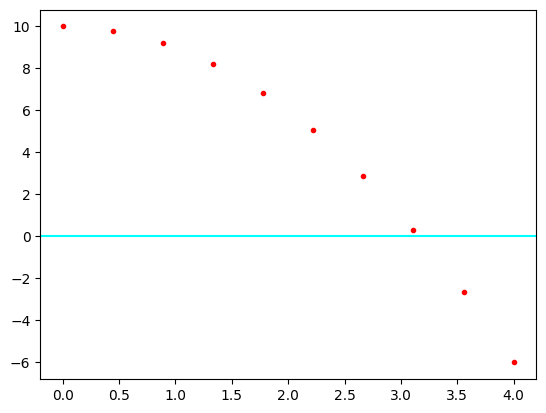

In [2]:
def f(x):
    return 10 - x**2

a0 = 0
b0 = 4
x = np.linspace(a0, b0, 10)
plt.plot(x, f(x), "r.")             # f(x), červeně
#plt.plot(x, [0]*len(x), "b-")       # seznam o 100 prvcích, všechny nulové
plt.axhline(0, color='cyan')        # osa x (horizontal)

plt.show()

#### Cv.6.1: Bisekce (půlení intervalu)
Postup metody bisekce (krok 𝑖)
- Rozpůlíme interval $⟨𝑎^𝑖,𝑏^𝑖⟩$ tak, že $𝑥^𝑖=\frac{𝑎^𝑖+𝑏^𝑖}2$.
- Dostaneme subintervaly $⟨𝑎^𝑖,𝑥^𝑖⟩$ a $⟨𝑥^𝑖,𝑏^𝑖⟩$.
- Posoudíme podmínku $𝑓(𝑎^𝑖 )⋅𝑓(𝑥^𝑖 )<0$ a $𝑓(𝑥^𝑖 )⋅𝑓(𝑏^𝑖 )<0$
- Vybereme interval vyhovující podmínce a dostaneme nový interval $⟨𝑎^{𝑖+1},𝑏^{𝑖+1}⟩$
- Celý postup opakujeme.
<!--img src="MS6_soubory/bisekce.png" alt="Drawing" style="width: 600px;"/-->

krok: 0 	střed: 2.0
krok: 1 	střed: 3.0
krok: 2 	střed: 3.5
krok: 3 	střed: 3.25
krok: 4 	střed: 3.125
krok: 5 	střed: 3.1875
krok: 6 	střed: 3.15625
krok: 7 	střed: 3.171875
krok: 8 	střed: 3.1640625
krok: 9 	střed: 3.16015625
krok: 10 	střed: 3.162109375
krok: 11 	střed: 3.1630859375
[2.         3.         3.5        3.25       3.125      3.1875
 3.15625    3.171875   3.1640625  3.16015625 3.16210938 3.16308594]


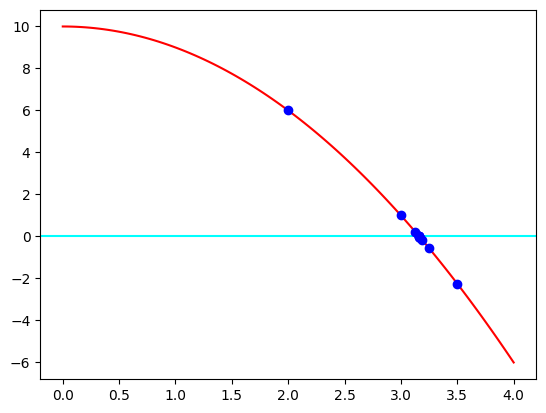

In [4]:
a = a0                          # 0
b = b0                          # 4
n = 12                           # počet kroků (např. 3)
xs = np.empty(shape=[n])        # pole 3x1 bez inicializace prvků (pro dílčí iterace)

for i in range(n):
    x = (a + b)/2               # střed
    if f(a)*f(x) < 0:
        b = x                   # osu protne vlevo
    else:
        a = x                   # osu protne vpravo
    print("krok:", i, "\tstřed:", x)
    xs[i] = x

print(xs)                       # vykreslení řešení (bod)
plt.axhline(0, color='cyan')    # osa x
x = np.linspace(a0, b0, 100)
plt.plot(x, f(x), "r")          # vykreslení pův. fce
plt.plot(xs, f(xs), "bo")
plt.show()

Iterační proces končí STOP podmínkou, pokud

- nalezneme kořen rovnice,
- je splněna konvergenční podmínka $\space\space b^k - a^k < 2\epsilon $
- $\epsilon$ je požadovaná přesnost



1 	 2.0
2 	 3.0
3 	 3.5
4 	 3.25
5 	 3.125
6 	 3.1875
7 	 3.15625
8 	 3.171875
9 	 3.1640625
10 	 3.16015625
11 	 3.162109375
Řešení x = 3.162109375


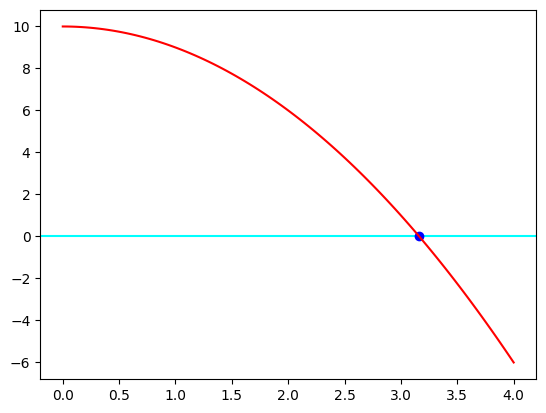

In [5]:
a = a0
b = b0
eps = 0.001
i = 0

while b - a > 2*eps:
    i += 1                          # počitadlo iterací
    x = (a + b)/2
    if f(a)*f(x) < 0:
        b = x
    else:
        a = x
    print(i,"\t", x)

print("Řešení x =",x)
plt.axhline(0, color='cyan')        # osa x
plt.plot(x, f(x), "bo")             # vykreslení řešení (bod)
vect_x = np.linspace(a0, b0, 100)   # pro vykreslení fce
plt.plot(vect_x, f(vect_x), "r")    # vykreslení pův. fce
plt.show()

In [10]:
from scipy import optimize

x = optimize.bisect(f, a0, b0)
print(x)

3.162277660167092


#### Cv.6.2: Regula falsi (metoda tětiv)
Na intervalu $\langle a^i,b^i \rangle$ určíme průsečík jako $$x^i = a^i - f(a^i)\frac{b^i-a^i}{f(b^i) - f(a^i)}$$
Dle podmínky $f(a)\cdot f(b) < 0$ určíme, který z intervalů $\langle a^i,x^i \rangle$ nebo $\langle x^i,b^i \rangle$ budeme dále používat a označíme

- $f(a^i)\cdot f(x^i) <0 \rightarrow b^i=x^i$
- $f(x^i)\cdot f(b^i) <0 \rightarrow a^i=x^i$


Celý postup opakujeme až do splnění STOP podmínky

- $f(a^i)\cdot f(b^i) \leq \delta$
- $|x^{i+1} - x^i| \leq \delta$


In [6]:
a = a0
b = b0
delta = 1E-3
i = 0

xnew = a
while True:                 # nebo while abs(xnew - xold) > delta
    i += 1
    xold = xnew
    xnew = a - f(a)*(b-a)/(f(b)-f(a))
    print(i, "\t", xnew)
    if f(a)*f(xnew) < 0:
        b = xnew                        # vlevo
    else:
        a = xnew                        # vpravo
    if abs(xnew - xold) <= delta:
        break
print("Řešení: x =", xnew)

1 	 2.5
2 	 3.0769230769230766
3 	 3.152173913043478
4 	 3.161094224924012
5 	 3.16213921901528
6 	 3.162261467346213
Řešení: x = 3.162261467346213


#### Cv.6.3: Newtonova metoda (metoda tečen)
$$x^{i+1} = x^i - \frac{f(x^i)}{f^{\prime}(x^i)}$$
Provedeme odhad kořene $x^{i+1}$ pomocí derivace fukce $f^{\prime}(x)$

iterujeme až do splnění STOP podmínky $|x^{i+1} - x^i| < \delta$

$\delta$ je přesnost, se kterou chceme kořen rovnice najít

In [7]:
#derivace pomoci centralni diference
def df(x, h = 1E-3):
    return (f(x+h)-f(x-h))/(2*h)

a = a0
b = b0
delta = 1E-3
i = 0

xnew = (a+b)/2
xold = a
while abs(xnew - xold) > delta:
    i += 1
    xold = xnew
    xnew = xold - f(xold)/df(xold)
    print(i, "\t", xnew)
print("Řešení: x =", xnew)

1 	 3.500000000000165
2 	 3.1785714285714137
3 	 3.1623194221508797
4 	 3.1622776604441363
Řešení: x = 3.1622776604441363


In [8]:
from scipy import optimize

x = optimize.newton(f, x0=(a0+b0/2))
print(x)

3.1622776601683795


### Samostatná cvičení

#### Cv.6.1: Nalezněte kořeny funkcí
Pomocí výše uvedených metod najděte kořeny následujících rovnic.
\begin{align*}
  0 = & x + \ln x\\
  0 = & \sin x - \frac{1}{2}x \\
  0 = & e^x + x^2 - 3 \\
  0 = & x - e^{-x}\\
  0 = & x\arctan x -1
\end{align*}


In [9]:
# obecná funkce pro vykreslení výsledku
import numpy as np
import matplotlib.pyplot as plt
def plot_result(f, a0, b0, x, title):               # fce, poč. a konc. x, řešení, nadpis
    print("kořen: ", x)
    plt.title(title)
    plt.axhline(0, color='cyan')                    # osa x
    plt.plot(x, f(x), "bo")                         # kořen
    vect_x = np.linspace(a0, b0, 100)
    plt.plot(vect_x, f(vect_x), "r")                # fce
    plt.show()

kořen:  0


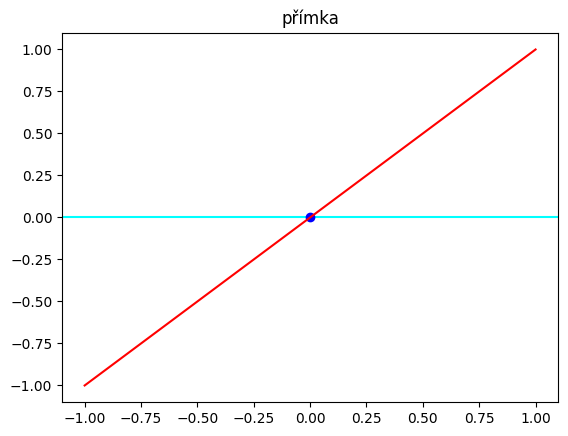

kořen:  0


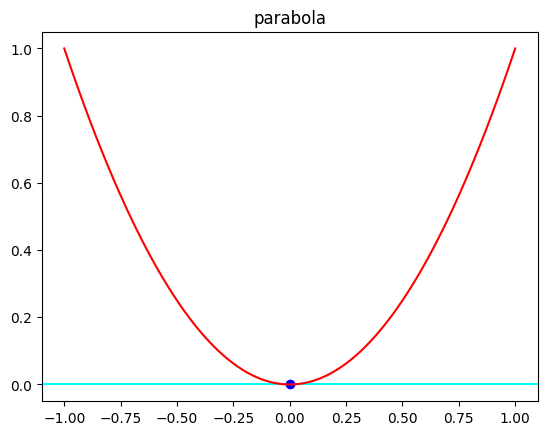

In [10]:
# příklad použití funkce pro vykreslení plot_result (řešení se zde nepočítá)
# jako parametr fce, meze, spočítané řešení x, nadpis
def g(x):
    return x
plot_result(g, -1, 1, 0, "přímka")
plot_result(lambda x: x*x, -1, 1, 0, "parabola")


In [11]:
def bisekce(f, a0, b0, eps=1E-3):
    a, b = a0, b0
    while b - a > 2*eps:
        x = (a + b)/2
        if f(a)*f(x) < 0:
            b = x
        else:
            a = x
    return x            

In [12]:
def regula_falsi(f, a0, b0, delta=1E-3):
    a, b = a0, b0
    xnew = (a+b)/2
    xold = a
    while abs(xnew - xold) > delta:
        xold = xnew
        xnew = a - f(a)*(b-a)/(f(b)-f(a))
        if f(a)*f(xnew) < 0:
            b = xnew
        else:
            a = xnew
    return xnew

In [13]:
def newton(f, a0, b0, delta=1E-3):
    a, b = a0, b0
    def df(x, h = 1E-3):
        return (f(x+h)-f(x-h))/(2*h)
    xnew = (a+b)/2
    xold = a
    while abs(xnew - xold) > delta:
        xold = xnew
        xnew = xold - f(xold)/df(xold)
    return xnew

kořen:  0.5665527343750001


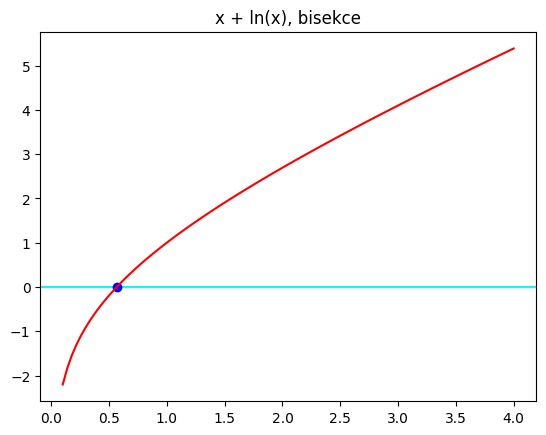

kořen:  1.8951017515189241


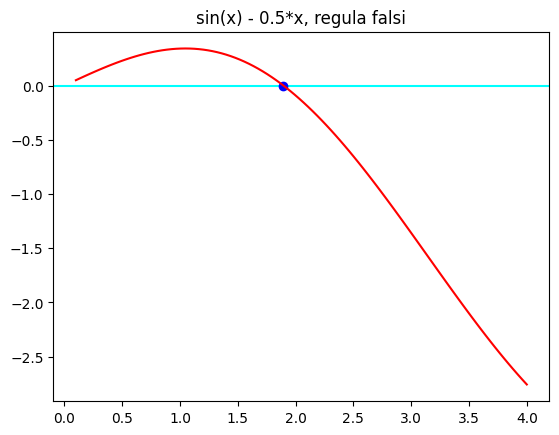

kořen:  0.8306590728485705


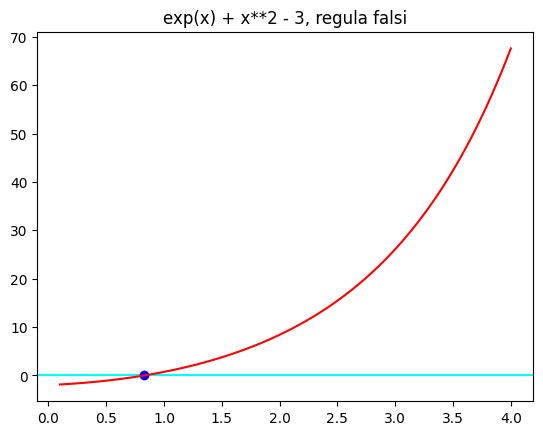

kořen:  0.567143290364994


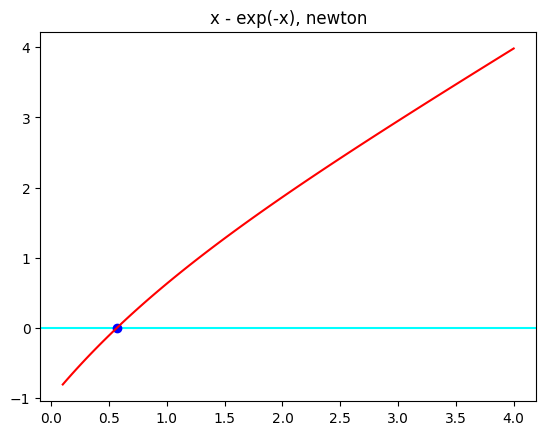

kořen:  1.1623398356584347


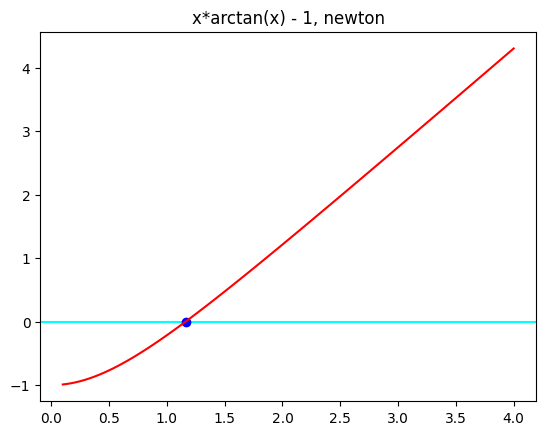

In [14]:
# funkci pro vykreslení plot_result dáme jako jeden z parametrů spočítané řešení x
func = lambda x: x + np.log(x)
plot_result(f=func, a0=0.1, b0=4, x=bisekce(f=func, a0=0.1, b0=4), title="x + ln(x), bisekce")

func = lambda x: np.sin(x) - 0.5*x
plot_result(f=func, a0=0.1, b0=4, x=regula_falsi(f=func, a0=0.1, b0=4), title="sin(x) - 0.5*x, regula falsi")

func = lambda x: np.exp(x) + x**2 - 3
plot_result(f=func, a0=0.1, b0=4, x=regula_falsi(f=func, a0=0.1, b0=4), title="exp(x) + x**2 - 3, regula falsi")

func = lambda x: x - np.exp(-x)
plot_result(f=func, a0=0.1, b0=4, x=newton(f=func, a0=0.1, b0=4), title="x - exp(-x), newton")

func = lambda x: x*np.arctan(x) - 1
plot_result(f=func, a0=0.1, b0=4, x=newton(f=func, a0=0.1, b0=4),  title="x*arctan(x) - 1, newton")